In [2]:
#imports
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#loading in csv/grabbing specific columns
df = pd.read_csv('Pokemon Database.csv',usecols=[
'Pokemon Name',
'Classification',
'Primary Type',
'Secondary Type',
'Game(s) of Origin',
'Pokemon Height',
'Pokemon Weight',
'Health Stat',
'Attack Stat',
'Defense Stat',
'Special Attack Stat',
'Special Defense Stat',
'Speed Stat',
'Base Stat Total',
'Catch Rate'])
#rename columns 
df = df.rename(columns={
'Pokemon Name':'Name',
'Primary Type':'Primary_Type',
'Secondary Type':'Secondary_Type',
'Game(s) of Origin':'Game_Origin',
'Pokemon Height':'Height',
'Pokemon Weight':'Weight',
'Health Stat':'Health',
'Attack Stat':'Attack',
'Defense Stat':'Defense',
'Special Attack Stat':'Special_Attack',
'Special Defense Stat':'Special_Defence',
'Speed Stat':'Speed',
'Base Stat Total':'Base_Stat',
'Catch Rate':'Catch_Rate'
})

In [4]:
# unique pokemons not including their transformation states
# from all games there are currently 1008 pokemons that are unique
Unique = df.drop_duplicates(subset='Name')
print(len(Unique))

1008


          amount
Flying         9
Fairy         29
Ice           31
Ghost         35
Steel         35
Dragon        36
Poison        38
Ground        40
Fighting      43
Dark          44
Rock          57
Electric      57
Psychic       61
Fire          64
Bug           83
Grass         97
Normal       116
Water        133


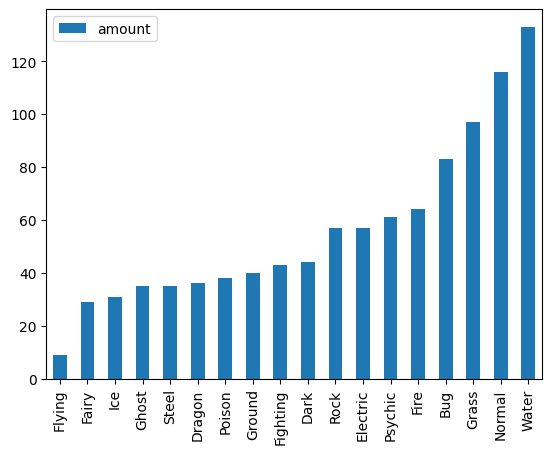

In [47]:
#total pokemon and # of pokemon by type
types = (df.Primary_Type.unique())
pokemonTypes = []
pokemonTypesNum = []
totalType = 0
for i in types:
    try:
        df1 = Unique.query(f"""
        Primary_Type == '{i}'
        """)
        totalType += df1['Name'].nunique()
        pokemonTypes.append(str(i).lstrip('"').rstrip('"'))
        pokemonTypesNum.append(int(df1['Name'].nunique()))
    except:
        pass

d= {'amount':pokemonTypesNum}
dfb = pd.DataFrame(data=d ,index=pokemonTypes)

dfb = dfb.sort_values(by=['amount'])
print (dfb)

x = dfb.plot.bar(use_index=True,y='amount',rot=90)

x.plot()
plt.show()

Fire Red             0
Leaf Green           0
Emerald              0
Platinum             0
Pokémon GO           2
Black 2              2
Omega Ruby           4
Ultra Sun            6
Legends: Arceus     14
X                   72
Sun                 84
Sword               95
Gold                98
Scarlet            104
Diamond            106
Ruby               131
Red                138
Black              152
Name: # of new pokemons, dtype: int64


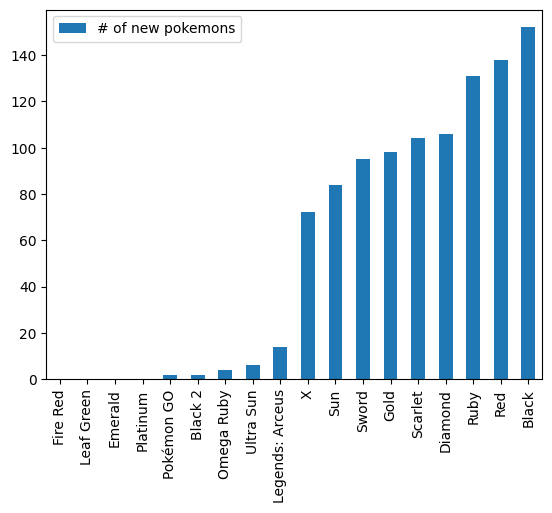

In [69]:
#total new pokemon and # of pokemon by gen
gameOrigin = (df.Game_Origin.unique())
totalGen = 0
gen = []
genNum = []
for i in gameOrigin:
    try:
        df2 = Unique.query(f"""Game_Origin == '{i}'""")
        totalGen += df2['Name'].nunique()
        gen.append(str(i).lstrip('"').rstrip('"'))
        genNum.append(int(df2['Name'].nunique()))
    except:
        pass
data = {'# of new pokemons':genNum}

dataf = pd.DataFrame(data=data ,index=gen)
dataf = dataf.sort_values(by=['# of new pokemons'])
print(dataf['# of new pokemons'])
dataf.plot.bar()



plt.show()
#from this chart we notice that majority of the pokemons were introduced in half of the games produced by the pokemon company. 
#this means the other games did not introduce any new pokemons/value to the end user besides the story.

Simple Analysis/Questions

$#total pokemons
    $/by type
    $/by game gen

#strongest pokemon
    /do pokemon typing correlate with strength?

#are pokemon that are more rare/harder to catch better/stronger in stats than common pokemons ie. is it worth it to catch rare pokemon?

